# Monte Carlo Simulation für Risikobewertung 

## Risikobewertung im Projektmanagement

Wie sicher sind Sie sich das der Terminplan funktioniert? - Diese Aussage wird im Alltag häufig gestellt und kann bloß mit Schwierigkeit beantwortet werden. Folgend ein kleiner Exkurs wie Sie zukünftig diese Frage beantworten können

In jedem Projekt treffen eine Vielzahl von Einzelschritten mit unterschiedlichen Risiken aufeinander. Während im einfachsten Fall einzelne Prozesse sequenziell aufeinanderfolgen sind in komplexen Projekten eine Vielzahl von Abhängigkeiten und paralleln Pfaden vorhanden. 
Während häufig für die Einzelprozesse eine konkrete Risikobewertung von Experten dargestellt werden kann ist die Risikobewertung mit klassichem Projektmanagement in den vernetzten Prozessen häufig bloß als best- und worst-case darstellbar.
Die Monte Carlo Simulation bietet hier ein Werkzeug zur Risikobewertung von vernetzten Prozessen auf Basis der Risikoabschätzungen der Einzelschritte

## Monte Carlo Simulation

Die Monte-Carlo-Simulation als stochastiches Mittel beschreibt ein Verfahren von bei dem eine sehr große Zahl gleichartiger Zufallsexperimente die Basis darstellt. 

In [16]:
# Input libaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.figure_factory as ff
%matplotlib inline


#### 1. Fall: Risiko-Bewertung eines Schrittes

Fallbeispiel: In der Produktentwicklung wird ein Prozess abgeschätzt mit 
- Durchlaufzeit 3 Tage mit 70% Wahrscheinlichkeit
- Durchlaufzeit 2 Tage mit 10% Wahrscheinlichkeit
- Durchlaufzeit 4 Tage mit 20% Wahrscheinlichkeit

In [17]:
df = [dict(Task="70%", Start='2009-01-01', Finish='2009-01-04'),
      dict(Task="10%", Start='2009-01-01', Finish='2009-01-02'),
      dict(Task="20%", Start='2009-01-01', Finish='2009-01-05')]

fig = ff.create_gantt(df, width=800, height=300)
fig.show()

Text(0.5, 0, 'Days')

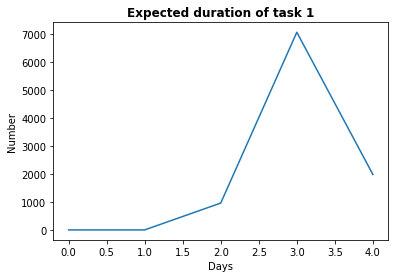

In [18]:
def task1_days() -> int:
    u = np.random.uniform()
    if u < 0.7: return 3
    if u < 0.8: return 2
    return 4

N = 10000
list=[]
sim = np.zeros(N, dtype=int)
for i in range(N):
    sim[i] = task1_days()
    
plt.plot(np.bincount(sim))
plt.title("Expected duration of task 1", weight="bold")
plt.ylabel('Number')
plt.xlabel('Days')

##### What happend?

Das Programm simuliert hier N-mal (d.h. 10.000x) den Task 1 - und 7000x wird der Wert "3 Tage" zurückgegeben (also 70% von 10.000 Durchläufen).

Oder gefragt welche Durchlaufzeit ergibt sich bei 70%-Sicherheit?

In [19]:

print("Mit 70% Wahrscheinlichkeit in : {} Tage".format(np.percentile(sim,70)))


Mit 70% Wahrscheinlichkeit in : 3.0 Tage


#### 2. Fall: Risiko-Bewertung mehrer sequenzieller Schritte

Jetzt überlagern wir zwei Prozesse sequenziell - und können kaum ohne komplexe Hilfsmittel die Sicherheiten angeben:

Fallbeispiel: 

Prozess 1
- Durchlaufzeit 3 Tage mit 70% Wahrscheinlichkeit
- Durchlaufzeit 2 Tage mit 10% Wahrscheinlichkeit
- Durchlaufzeit 4 Tage mit 20% Wahrscheinlichkeit

Prozess 2
- Durchlaufzeit 4 Tage mit 50% Wahrscheinlichkeit
- Durchlaufzeit 10 Tage mit 10% Wahrscheinlichkeit
- Durchlaufzeit 3 Tage mit 40% Wahrscheinlichkeit

In [20]:
df = [dict(Task="best case Prozess 1", Start='2009-01-01', Finish='2009-01-03'),
      dict(Task="best case Prozess 2", Start='2009-01-03', Finish='2009-01-07'),
      dict(Task="worst case Prozess 1", Start='2009-01-01', Finish='2009-01-05'),
      dict(Task="worst case Prozess 2", Start='2009-01-05', Finish='2009-01-15')]

fig = ff.create_gantt(df, width=800, height=300)
fig.show()

Text(0.5, 0, 'Days')

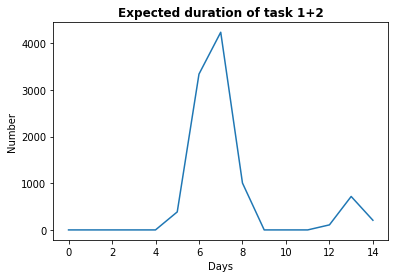

In [21]:
def task1_days() -> int:
    u = np.random.uniform()
    if u < 0.7: return 3
    if u < 0.8: return 2
    return 4

def task2_days() -> int:
    u = np.random.uniform()
    if u < 0.5: return 4
    if u < 0.6: return 10
    return 3

def project_duration() -> int:
    return task1_days() + task2_days()

N = 10000
sim = np.zeros(N, dtype=int)
for i in range(N):
    sim[i] = project_duration()
    
plt.plot(np.bincount(sim));
plt.title("Expected duration of task 1+2", weight="bold")
plt.ylabel('Number')
plt.xlabel('Days')

In [22]:

print("Mit 40% Wahrscheinlichkeit in : {} Tage".format(np.percentile(sim,40)))
print("Mit 70% Wahrscheinlichkeit in : {} Tage".format(np.percentile(sim,70)))
print("Mit 90% Wahrscheinlichkeit in : {} Tage".format(np.percentile(sim,90)))

Mit 40% Wahrscheinlichkeit in : 7.0 Tage
Mit 70% Wahrscheinlichkeit in : 7.0 Tage
Mit 90% Wahrscheinlichkeit in : 12.0 Tage


Die Wahrscheinlichkeiten manuell anzugeben wäre bereits bei 2 Prozessen sehr aufwendig

#### 3. Fall: Risiko-Bewertung mit parallelen Vorgängen


Fallbeispiel: 

Prozess 1
- Durchlaufzeit 3 Tage mit 70% Wahrscheinlichkeit
- Durchlaufzeit 2 Tage mit 10% Wahrscheinlichkeit
- Durchlaufzeit 4 Tage mit 20% Wahrscheinlichkeit

Prozess 2
- Durchlaufzeit 4 Tage mit 50% Wahrscheinlichkeit
- Durchlaufzeit 10 Tage mit 10% Wahrscheinlichkeit
- Durchlaufzeit 3 Tage mit 40% Wahrscheinlichkeit

Prozess 3 - Paraller Prozess zu 2
- Durchlaufzeit 5 Tage mit 70% Wahrscheinlichkeit
- Durchlaufzeit 2 Tage mit 10% Wahrscheinlichkeit
- Durchlaufzeit 9 Tage mit 20% Wahrscheinlichkeit

In [23]:
df = [dict(Task="best case Prozess 1", Start='2009-01-01', Finish='2009-01-03'),
      dict(Task="best case Prozess 2", Start='2009-01-03', Finish='2009-01-07'),
      dict(Task="best case Prozess 3", Start='2009-01-03', Finish='2009-01-05'),
      dict(Task="worst case Prozess 1", Start='2009-01-01', Finish='2009-01-05'),
      dict(Task="worst case Prozess 2", Start='2009-01-05', Finish='2009-01-15'),
      dict(Task="worst case Prozess 3", Start='2009-01-05', Finish='2009-01-14')]

fig = ff.create_gantt(df, width=800, height=300)
fig.show()

Bereits in der Darstellung des Gant-Charts wird die Komplexität und Abhängigkeiten der Prozesse sichtbar. Eine bewertbare Aussage ist hier maximal vor Best-/ und Worst-case-Annahmen möglich. 
Die Statisik ergibt folgendes:

Text(0.5, 0, 'Days')

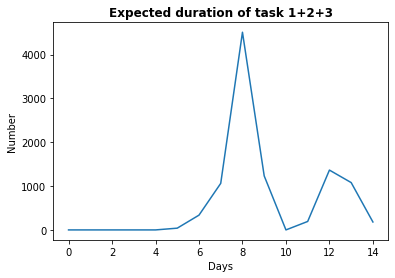

In [24]:
def task1_days() -> int:
    u = np.random.uniform()
    if u < 0.7: return 3
    if u < 0.8: return 2
    return 4

def task2_days() -> int:
    u = np.random.uniform()
    if u < 0.5: return 4
    if u < 0.6: return 10
    return 3

def task3_days() -> int:
    u = np.random.uniform()
    if u < 0.7: return 5
    if u < 0.8: return 2
    return 9

def project_duration() -> int:
    return task1_days()+max(task2_days(),task3_days())

N = 10000
sim = np.zeros(N, dtype=int)
for i in range(N):
    sim[i] = project_duration()
    
plt.plot(np.bincount(sim));
plt.title("Expected duration of task 1+2+3", weight="bold")
plt.ylabel('Number')
plt.xlabel('Days')

In [25]:

for i in range(0,110,10):
    print('Mit '+ str(i) +'% Wahrscheinlichkeit in : {} Tage'.format(np.percentile(sim,i)))

Mit 0% Wahrscheinlichkeit in : 5.0 Tage
Mit 10% Wahrscheinlichkeit in : 7.0 Tage
Mit 20% Wahrscheinlichkeit in : 8.0 Tage
Mit 30% Wahrscheinlichkeit in : 8.0 Tage
Mit 40% Wahrscheinlichkeit in : 8.0 Tage
Mit 50% Wahrscheinlichkeit in : 8.0 Tage
Mit 60% Wahrscheinlichkeit in : 9.0 Tage
Mit 70% Wahrscheinlichkeit in : 9.0 Tage
Mit 80% Wahrscheinlichkeit in : 12.0 Tage
Mit 90% Wahrscheinlichkeit in : 13.0 Tage
Mit 100% Wahrscheinlichkeit in : 14.0 Tage


Jetzt ist eine quantitative Aussage bzgl. der Zeiträume und Sicherheiten möglich. Diese Technik lässt sich beliebig auch bei komplexeren Sachverhalten anwenden